In [2]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_excel(r"C:\Users\Sahib Alizada\Desktop\SHB\Real Projects\3-Marketing Campaign Performance Analysis\Raw Data\marketing_campaign.xlsx")

In [7]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [9]:
df.shape

(2240, 29)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [11]:
campaign_cols = [
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response"
]


In [12]:
acceptance_rates = {}

for col in campaign_cols:
    acceptance_rates[col] = df[col].mean() * 100

acceptance_df = pd.DataFrame.from_dict(
    acceptance_rates, orient="index", columns=["Acceptance_Rate_%"]
)

acceptance_df


,Acceptance_Rate_%
AcceptedCmp1,6.428571
AcceptedCmp2,1.339286
AcceptedCmp3,7.276786
AcceptedCmp4,7.455357
AcceptedCmp5,7.276786
Response,14.910714


In [13]:
acceptance_df.sort_values("Acceptance_Rate_%", ascending=False)


,Acceptance_Rate_%
Response,14.910714
AcceptedCmp4,7.455357
AcceptedCmp3,7.276786
AcceptedCmp5,7.276786
AcceptedCmp1,6.428571
AcceptedCmp2,1.339286


<Axes: title={'center': 'Campaign Acceptance Rates (%)'}>

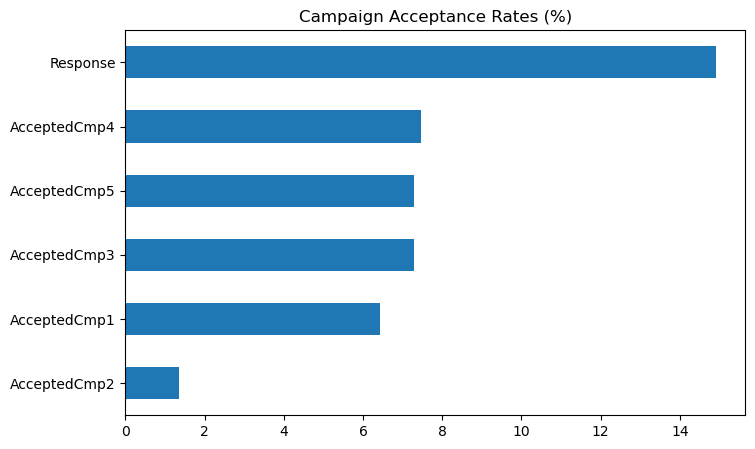

In [14]:
acceptance_df.sort_values("Acceptance_Rate_%").plot(
    kind="barh",
    legend=False,
    title="Campaign Acceptance Rates (%)",
    figsize=(8,5)
)


In [16]:
### Key Insight
# The most recent marketing campaign shows a significantly higher acceptance rate
# compared to previous campaigns.


In [17]:
acceptance_df.reset_index(inplace=True)
acceptance_df.columns = ["Campaign", "Acceptance_Rate"]
acceptance_df

,Campaign,Acceptance_Rate
0,AcceptedCmp1,6.428571
1,AcceptedCmp2,1.339286
2,AcceptedCmp3,7.276786
3,AcceptedCmp4,7.455357
4,AcceptedCmp5,7.276786
5,Response,14.910714


In [18]:
acceptance_df.to_csv("campaign_acceptance_rates.csv", index=False)
